# Stark map for Rydberg helium

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from helium_stark import *

In [2]:
# quantum numbers
nmin = 50
nmax = 60
S = 1
m = 0
n_vals, L_vals = get_nl_vals(nmin, nmax, m)
J_vals = get_J_vals(S, L_vals, 1)
# quantum defects
neff = n_vals - get_qd(S, n_vals, L_vals, J_vals)
# field-free Hamiltonian
H_0 = np.diag(En_0(neff))
# find the off-diagonal terms of the Stark interaction matrix
mat_S = stark_matrix(neff, L_vals, m)

calculate Stark terms: 100%|████████████████████████████████████████████████████████| 605/605 [00:04<00:00, 151.04it/s]


In [3]:
# specify the electric field
field = np.linspace(0, 5, 1001) # V /cm
field_au = field * 100 * e * a_0 / En_h
# diagonalise for each field
map1 = stark_map(H_0, mat_S, field_au)

diagonalise Hamiltonian: 100%|█████████████████████████████████████████████████████| 1001/1001 [01:14<00:00, 13.54it/s]


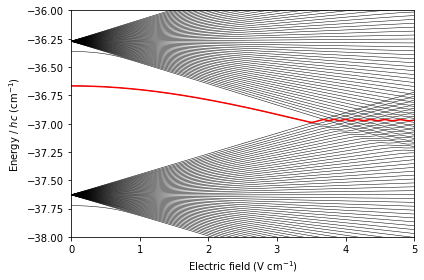

In [4]:
# Stark map
fig, ax = plt.subplots(figsize=(6, 4))

for s0 in range(np.shape(map1)[1]):
    ax.plot(field, 0.01*map1[:, s0] * En_h /(h * c), c='k', ls='-', lw=0.5)

# highlight (assuming states do not cross)
idx = np.intersect1d(np.where(n_vals == 55), np.where(L_vals == 0))[0]
ax.plot(field, 0.01*map1[:, idx] * En_h /(h * c), c='r', ls='-', lw=1.5)

# format
ax.set_ylim(-38, -36)
ax.set_xlim(0, 5)
ax.set_xlabel('Electric field (V cm$^{-1}$)')
ax.set_ylabel('Energy / $h c$ (cm$^{-1}$)')
plt.tight_layout()
# output
fileout = os.path.join("..", "images", "n50-n60_stark_map.png")
plt.savefig(fileout)
plt.show()
plt.show()